In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvx

In [3]:
def select_class(image, label, class_list=[1, 7]):
    '''
    inputs:
    image: 2-dim numpy array, (60000 x 784)
    label: 2-dim numpy array, (60000 x 10)
    class_list: a list contains the class that we want to select 
    ex. if we want "1" and "7", class_list = [1, 7]
    
    outputs:
    selected_image: 2-dim numpy array (# examples x 784)
    selected_label: 2-dim numpy array (# examples x 784)
    
    '''
    selected_image = []
    selected_label = []
    m = image.shape[0]
    for i in range(m):
        for cls in class_list:
            if label[i][cls] == 1:
                selected_image.append(image[i])
                selected_label.append(label[i])
                break     
    return np.array(selected_image), np.array(selected_label)

def apply_erasure(image, label, p=0.6):
    '''
    inputs:
    image: 2-dim training example, has shape (#examples x 784)
    label: 2-dim label, has shape (#examples x 784)
    p: erasure ratio
    
    outputs:
    erased_image: has same shape with the original image
    label: just copy original label
    
    '''
    size = image.shape
    random_mat = np.random.uniform(low=0, high=1, size=size)
    cond = np.less(random_mat, 1-p)
    erased_image = np.where(cond, image, 0)
    return erased_image, label

In [4]:
test_X = np.load("test_X.npy")
test_Y = np.load("test_Y.npy")

train_X = np.load("train_X.npy")
train_Y = np.load("train_Y.npy")

In [5]:
# usage

-- shape for training data -- 
(13007, 784)
(13007, 10)
-- shape for testing data -- 
(2163, 784)
(2163, 10)


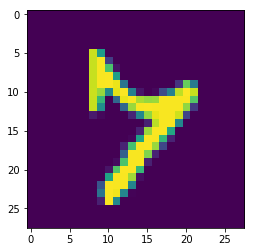

In [7]:
class_list = [1, 7]
train_X_17, train_Y_17 = select_class(train_X, train_Y, class_list)
print("-- shape for training data -- ")
print(train_X_17.shape)
print(train_Y_17.shape)

test_X_17, test_Y_17 = select_class(test_X, test_Y, class_list)
print("-- shape for testing data -- ")
print(test_X_17.shape)
print(test_Y_17.shape)

img = train_X_17[9].reshape(28, 28)
plt.imshow(img)

In [9]:
erased_train_X, train_Y = apply_erasure(train_X_17, train_Y_17, 0.6)
print("-- shape for erased training data -- ")
print(erased_train_X.shape)
print(train_Y.shape)

-- shape for erased training data -- 
(13007, 784)
(13007, 10)


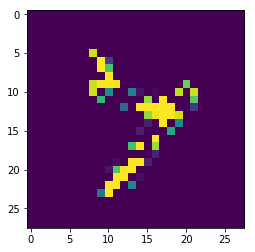

In [10]:
img = erased_train_X[9].reshape(28, 28)
plt.imshow(img)